In [10]:
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split




In [11]:
X,y=make_classification(n_samples=10000,n_features=2,n_redundant=0,weights=[0.99])

In [12]:
X

array([[-2.56799686, -1.64888669],
       [-1.73665281, -0.1105813 ],
       [ 0.29494958,  1.87766871],
       ...,
       [-1.34211734,  1.03622314],
       [ 0.60655491,  1.79322767],
       [-2.97835234, -0.04514759]])

In [13]:
Counter(y)

Counter({0: 9857, 1: 143})

<Axes: xlabel='0', ylabel='1'>

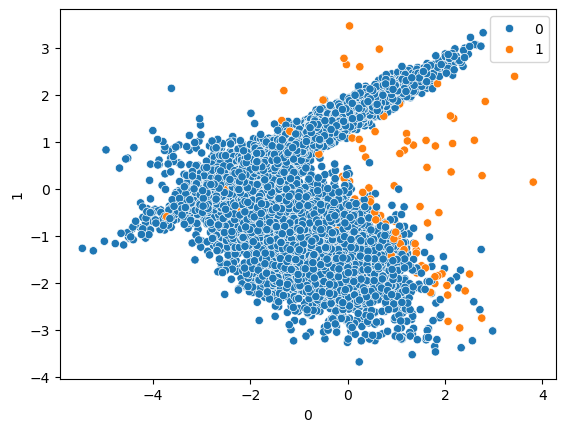

In [14]:
import seaborn as sns
import pandas as pd
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [20]:
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)   
model=LogisticRegression()
penalty=['l1','l2','elasticnet']
c_values=[0.1,1.0,10,100]
solver=['newton-cg','lbfgs']
class_weight=[{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]
params=dict(penalty=penalty,C=c_values,solver=solver,class_weight=class_weight)

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold(n_splits=6)
grid=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv)
grid.fit(X_train,y_train)

c:\Users\SRIHARSHITH\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1536 fits failed out of a total of 2304.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
384 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\SRIHARSHITH\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\SRIHARSHITH\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\SRIHARSHITH\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", lin

GridSearchCV(cv=StratifiedKFold(n_splits=6, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1.0, 10, 100],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs']},
             scoring='accuracy')

In [21]:
grid.best_params_

{'C': 0.1,
 'class_weight': {0: 10, 1: 10},
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [ ]:
y_pred=grid.predict(x_test)

Counter({0: 9857, 1: 143})

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,f1_score
accuracy=accuracy_score(y_test,y_pred)
confusion_matrix=confusion_matrix(y_test,y_pred)
print("Accuracy:",accuracy)
print("Confusion Matrix\n",confusion_matrix)

Accuracy: 0.988
Confusion Matrix
 [[2963    0]
 [  36    1]]
